# Fit Hologram parameters For AuxTel

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : March 1st 2021
- version 3

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is


plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
FLAG_HOMOTHETIE   = True
FLAG_STEPOPTIMIZE = False

# constants

- all transverse physical coordinates are in mm and relative to beam optical center (at CCD center)

In [3]:
# conversion in good inits
u_radtodeg=180.0/np.pi
u_degtorad=np.pi/180.
u_mtomm=1e3

- all constants are refered as $c\_$

In [4]:
c_F=18.0*1.2*u_mtomm # Auxtel Focla length # ou 13.7m

In [5]:
c_F

21599.999999999996

In [6]:
c_Z1=200. # mm, distance between hologram and source plane during holo recording
c_Z0=178. # mm, distance between hologram and CCD plane for observations 

In [7]:
c_d1=20.0 # mm, distance between the sources during recording 

In [8]:
c_X_Oh=7  # mm , x-coordinates of the hologram optical center in the CCD ref frame
c_Y_Oh=5 # mm , y-coordinate of the hologram optical center in the CCD ref frame

In [9]:
c_beta0=10 #degree , angle of rotation of hologram source axis wrt CCD  

In [124]:
c_wl0= 639e-6 # mm, recording wavelength 

# Functions

- $(X,Y)$ : coordinates in CCD frame with telecope optical center as the origin
- $(x,y)$ : coordinates in hologram frame with telecope optical center as the origin the same reference axis as the CCD
- $(x_1,y_1)$ : coordinates in hologram reference frame, with telecope optical center as the origin, such the two sources A $(x_1(A),y_1(A))$ and B $(x_1(B),y_1(B))$ have coordinates:
$$
x_1(A)= x_1 (0)-d_1/2 
$$
$$
y_1(A)= y_1(0)
$$
$$
x_1(B)= x_1 (0)+d_1/2 
$$
$$
y_1(B)= y_1(0)
$$

In [10]:
def XYtoxy(XY,Z):
    """
    XYtoxy(XY,Z): convert coordinates in CCD plane (R) to the CCD plane projected at hologram plane.
    The origin of the coordinates is always the optical center of the telescope.
    
    The coordinates undergo an homothetie.
    
    
    
    input parameters
    - XY : numpy array of the 2-coordinates in CCD in mm
    - Z : distance between hologram and CCD in mm (positive)
    
    output parameter 
    - xy : numpy array of the 2-coordinates in  in mm at hologram position
    """
    XY=np.array(XY)
    
    if FLAG_HOMOTHETIE:
        xy=(1-Z/c_F)*XY  #small contraction
    else:
        xy=XY
    
    return xy  

In [11]:
def XYtoxy_2D(X,Y,Z):
    """
    XYtoxy(XY,Z): convert coordinates in CCD plane (R) to the CCD plane projected at hologram plane.
    The origin of the coordinates is always the optical center of the telescope.
    
    The coordinates undergo an homothetie.
    
    
    
    input parameters
    - XY : numpy array of the 2-coordinates in CCD in mm
    - Z : distance between hologram and CCD in mm (positive)
    
    output parameter 
    - xy : numpy array of the 2-coordinates in  in mm at hologram position
    """
    if FLAG_HOMOTHETIE:
        x=(1-Z/c_F)*X  #small contraction
        y=(1-Z/c_F)*Y  #small contraction
    else:
        x=X
        y=Y
    
    return x,y  

In [12]:
def xytoXY(xy,Z):
    """
    xytoXY(xy,Z): convert coordinates in hologram plane to CCD plane.
    The origin of the coordinates is always the optical center of the telescope.
    
    input parameters
    - xy : numpy array of the 2-coordinates in  in mm
    - Z : distance between hologram and CCD in mm (positive)
    
    output parameter 
    - XY : numpy array of the 2-coordinates in CCD in mm
    
    """
    xy=np.array(xy)
    
    if FLAG_HOMOTHETIE:
        XY=1./(1-Z/c_F)*xy #small dilatation
    else:
        XY=xy
    
    return XY  

In [13]:
def xytoXY_2D(x,y,Z):
    """
    xytoXY(xy,Z): convert coordinates in hologram plane to CCD plane.
    The origin of the coordinates is always the optical center of the telescope.
    
    input parameters
    - xy : numpy array of the 2-coordinates in  in mm
    - Z : distance between hologram and CCD in mm (positive)
    
    output parameter 
    - XY : numpy array of the 2-coordinates in CCD in mm
    
    """
    if FLAG_HOMOTHETIE: 
        X=1./(1-Z/c_F)*x #small dilatation
        Y=1./(1-Z/c_F)*y #small dilatation
    else:
        X=x
        Y=y
    
    return X,Y  

In [14]:
def xytox1y1(xy,beta,x0,y0):
    """
    xytox1y1(xy,alpha): convert coordinates in hologram plane (same ref axis as CCD) with origin at O, the optical center
    of the telescope the instrinsic hologram frame with origin Oh, the optical center of the hologram.
    
    Both system are rotated by an angle beta such the Oh-x1 axis is parallel to sources A,B)
    
    input parameters
    - xy : numpy array of the 2-coordinates in hologram which ref axis are those of CCD and origin is O
    - beta : angle in degree
    
    - (x0,y0) : coordinate of hologram geometrical Oh (projected at hologram plane)
    
    output parameter 
    - x1y1 : mm, numpy array of the 2-coordinates in the intrinsic hologram frame
    
    """
    
    cos_beta=np.cos(beta*u_degtorad)
    sin_beta=np.sin(beta*u_degtorad)
    x=xy[0]-x0
    y=xy[1]-y0   
    x1y1=np.array([cos_beta*x+sin_beta*y,-sin_beta*x+cos_beta*y])
    return x1y1
    
 

In [15]:
def xytox1y1_2D(x,y,beta,x0,y0):
    """
    
    2D version of function xytox1y1()
    
    convert coordinates in hologram plane (same ref axis as CCD) with origin at O, the optical center
    of the telescope the instrinsic hologram frame with origin Oh, the optical center of the hologram.
    
    Both system are rotated by an angle beta such the Oh-x1 axis is parallel to sources A,B)
     
    
    input parameters
    - x,y : 2D-numpy array of the 2-coordinates in hologram plane which ref axis are those of CCD and origin is O
    - alpha : angle in degree
    
    - (x0,y0) : coordinate of hologram geometrical Oh in CCD axis frame projected at hologram plane
    Usually x0,y0 are 2D arrays representing 
    the various hypothesis on Oh position when computing a Chi2 
    
    output parameter 
    - x1,y1 : mm, 2D-numpy array of the 2-coordinates in the intrinsic hologram frame
    
    """
    
    cos_beta=np.cos(beta*u_degtorad)
    sin_beta=np.sin(beta*u_degtorad)
    
    x=x-x0
    y=y-y0
    
    x1=cos_beta*x+sin_beta*y
    y1=-sin_beta*x+cos_beta*y
       
    
    return x1,y1

In [16]:
def x1y1toxy(x1y1,beta,x0,y0):
    """
    x1y1toxy(x1y1,beta,x0,y0): convert coordinates in the intrinsic hologram frame R1h to the hologram frame Rh
    with same axis as CCD , both frame being rotated by a relative angle beta
    
    input parameters
    - x1y1 : mm, numpy array of the 2-coordinates in the intrinsic hologram frame  R1h
    - beta : angle in degree
    - (x0,y0) : coordinate of hologram geometrical Oh in CCD axis frame but projected at hologram plane
    
    output parameter 
     - xy : numpy array of the 2-coordinates in hologram which ref axis are those of CCD mm
   
    
    """
    
    cos_beta=np.cos(beta*u_degtorad)
    sin_beta=np.sin(beta*u_degtorad)
    
    x1=x1y1[0]
    y1=x1y1[1]
    
    # note the coordinate are shifted wrt Oh point coordinates in CCD 
    xy=np.array([cos_beta*x1-sin_beta*y1+x0,sin_beta*x1+cos_beta*y1+y0])
    return xy

In [17]:
def x1y1toxy_2D(x1,y1,beta,x0,y0):
    """
    
    2D version of x1y1toxy(x1y1,beta,x0,y0):
    x1y1toxy_2D(x1,y1,alpha): convert coordinates in the intrinsic hologram frame  to the hologram frame 
    with same axis as CCD by an angle beta 
    
    input parameters
    - x1,y1 : mm, 2D numpy array of the 2-coordinates in the intrinsic hologram frame  
    - alpha : angle in degree
    - (x0,y0) : coordinate of hologram geometrical Oh in CCD axis frame but projected at hologram plane
    
    output parameter 
     - x,y : 2D numpy array of the 2-coordinates in hologram which ref axis are those of CCD mm
   
    
    """
    
    cos_beta=np.cos(beta*u_degtorad)
    sin_beta=np.sin(beta*u_degtorad)
    
    
    x=cos_beta*x1-sin_beta*y1+x0
    y=sin_beta*x1+cos_beta*y1+y0
    return x,y

In [18]:
def dist1_to_source(xy,xy_s):
    """
    dist1_to_source(xy,xy_s) : distance between a point M(x,y) to a source S(x_S,y_s) at hologram recording phase
    
    The alpha hologram rotation angle is not important provided both point M and source S have the same reference axis
    
     input parameters
    - xy   : mm, 1D-numpy array of the 2-coordinates of point M in the  hologram frame  
    - xy_s : mm, 1D-numpy array of the 2-coordinates of the source in the  hologram frame  
    
    
    output parameter:
    return the 3d distance 
    
    """
    
    return np.sqrt(c_Z1**2+ (xy[0]-xy_s[0])**2+ (xy[1]-xy_s[1])**2)

In [19]:
def ddist1_to_source(x,y,x_s,y_s):
    """
    ddist1_to_source(xy,xy_s) : distance between a point M(x,y) to a source S(x_S,y_s) at hologram recording phase
    
    more efficient than dist1_to_source(xy,xy_s) because x,y are 2D numpy arrays.
    
    The alpha hologram rotation angle is not important provided both point M and source S have the same reference axis
    
     input parameters
    - x,y   : mm, 2D-numpy array of the 2-coordinates of point M in the  hologram frame  
    - x,y_s : mm, scalar the 2-coordinates of the source in the  hologram frame  
    
    
    output parameter:
    return the distance in 3D in a 2D numpy array
    
    Note : Either (x,y) are 2 2D-numpy array and (x_s,y_s) are 2 scalars 
           Or  (x,y) are 2 scalars and (x_s,y_s) are 2 2D-numpy arrays
    
    """
    
    return np.sqrt(c_Z1**2 + (x-x_s)**2+ (y-y_s)**2)

In [20]:
def d_phi(x1y1):
    """  
    d_phi(x1y1) : phase difference (distance difference at point(x1y1) )
    
    input parameters
    - x1y1   : mm, numpy array of the 2-coordinates of point M in the  intrinsic hologram frame  
         
    output parameter:
    return the angle d_alpha in degree
    
    """
    
    
    x1y1_A=np.array([-c_d1/2, 0]) # coordinate of source A
    x1y1_B=np.array([+c_d1/2, 0]) # coordinate of source B
    
    d1_A=dist1_to_source(x1y1,x1y1_A)  # distance to source A
    d1_B=dist1_to_source(x1y1,x1y1_B)  # distance to source B
    
    d_phi=d1_A-d1_B
   
    
    return d_phi

In [21]:
def dd_phi(x1,y1):
    """
    dd_alpha(x1,y1) : angle d_alpha of hologram dispersion axis un hologram intrinsic reference frame
    
    more efficient than d_alpha(x1y1,x1y1_0) because x1,y1 are a 2D numpy array
    
    input parameters are 2D numpy array
    - x1,y1   : mm, 2D numpy array of the 2-coordinates of point M in the  intrinsic hologram frame  
     
    
    output parameter:
    return the angle d_alpha in degree in a 2D numpy array
    
    
    Notes :
     - Either (x1,y1) may be 2 2D-numpy arrays and x1_0,y1_0 two scalars : to get the d_alpha(x1,y1)
     - Or fix (x1,y1) as two scalars where the angle is measured and (x1_0,y1_0) are 2 2D numpy arrays
     for scanning in chi2 function the best position for parameters (x1_0,y1_0) 
    
    """
    
    
    x1_A=-c_d1/2 # coordinate of source A
    y1_A=0.        # coordinate of source A
    
    x1_B=c_d1/2 # coordinate of source B
    y1_B=0        # coordinate of source B
    
    dd1_A=ddist1_to_source(x1,y1,x1_A,y1_A)  # distance to source A in a 2D numpy array
    dd1_B=ddist1_to_source(x1,y1,x1_B,y1_B)  # distance to source B
    
    
    dd_phi=dd1_A-dd1_B
    
    return dd_phi # in a 2D numpy array

In [22]:
def d_alpha(x1y1):
    """
    d_alpha(x1y1) : angle d_alpha of hologram dispersion axis un hologram intrinsic reference frame
    
    
    input parameters
    - x1y1   : mm, numpy array of the 2-coordinates of point M in the  intrinsic hologram frame  
    
     
    output parameter:
    return the angle d_alpha in degree
    
    """
    
    
    x1y1_A=np.array([-c_d1/2, 0]) # coordinate of source A
    x1y1_B=np.array([+c_d1/2, 0]) # coordinate of source B
    
    d1_A=dist1_to_source(x1y1,x1y1_A)  # distance to source A
    d1_B=dist1_to_source(x1y1,x1y1_B)  # distance to source B
    
    
    num_tan_dalpha= d1_B*(x1y1[1]-x1y1_A[1])-d1_A*(x1y1[1]-x1y1_B[1])
    den_tan_dalpha= d1_B*(x1y1[0]-x1y1_A[0])-d1_A*(x1y1[0]-x1y1_B[0])
    
    #tan_dalpha=- num_tan_dalpha/den_tan_dalpha
    tan_dalpha= num_tan_dalpha/den_tan_dalpha
    
    d_alpha=u_radtodeg*np.arctan(tan_dalpha)
    
    return d_alpha

In [23]:
def dd_alpha(x1,y1):
    """
    dd_alpha(x1,y1) : angle d_alpha of hologram dispersion axis un hologram intrinsic reference frame
    
    more efficient than d_alpha(x1y1,x1y1_0) because x1,y1 are a 2D numpy array
    
    input parameters are 2D numpy array
    - x1,y1   : mm, 2D numpy array of the 2-coordinates of point M in the  intrinsic hologram frame  
     
    
    output parameter:
    return the angle d_alpha in degree in a 2D numpy array
    
    
    Notes :
     - Either (x1,y1) may be 2 2D-numpy arrays and x1_0,y1_0 two scalars : to get the d_alpha(x1,y1)
     - Or fix (x1,y1) as two scalars where the angle is measured and (x1_0,y1_0) are 2 2D numpy arrays
     for scanning in chi2 function the best position for parameters (x1_0,y1_0) 
    
    """
    
    
    x1_A=-c_d1/2 # coordinate of source A
    y1_A=0.        # coordinate of source A
    
    x1_B=c_d1/2 # coordinate of source B
    y1_B=0        # coordinate of source B
    
    dd1_A=ddist1_to_source(x1,y1,x1_A,y1_A)  # distance to source A in a 2D numpy array
    dd1_B=ddist1_to_source(x1,y1,x1_B,y1_B)  # distance to source B
    
    
    num_tan_dalpha= dd1_B*(y1-y1_A)-dd1_A*(y1-y1_B)
    den_tan_dalpha= dd1_B*(x1-x1_A)-dd1_A*(x1-x1_B)
    
    #tan_dalpha=- num_tan_dalpha/den_tan_dalpha
    tan_dalpha= num_tan_dalpha/den_tan_dalpha   
    #d_alpha=u_radtodeg*np.arctan(tan_dalpha)
    
    d_alpha=u_radtodeg*np.arctan2(num_tan_dalpha,den_tan_dalpha)
    
    return d_alpha # in a 2D numpy array

In [144]:
def N_density(x1,y1):
    """
    
    Compute the grove density (ruling)
    
    """
    
    x1_A=-c_d1/2 # coordinate of source A
    y1_A=0.        # coordinate of source A
    
    x1_B=c_d1/2 # coordinate of source B
    y1_B=0        # coordinate of source B
    
    dd1_A=ddist1_to_source(x1,y1,x1_A,y1_A)  # distance to source A in a 2D numpy array
    dd1_B=ddist1_to_source(x1,y1,x1_B,y1_B)  # distance to source B
    
    alpha=dd_alpha(x1,y1)
    
    
    dNdx=1/c_wl0*( (x1-x1_A)/dd1_A - (x1-x1_B)/dd1_B)
    dNdy=1/c_wl0*( (y1-y1_A)/dd1_A - (y1-y1_B)/dd1_B)
    
    ruling=np.abs(dNdx*np.cos(alpha)+ dNdy*np.sin(alpha))
    #ruling=dNdx*np.cos(alpha)+ dNdy*np.sin(alpha)
    
    return ruling
    

# Check formula

In [24]:
XMIN=-40
XMAX=40
YMIN=-40
YMAX=40
NPIX=1000

In [25]:
X = np.linspace(XMIN, XMAX, NPIX)
Y = np.linspace(YMIN, YMAX, NPIX)
XX, YY = np.meshgrid(X, Y, sparse=False)

### Homothetie

In [26]:
xx_cont,yy_cont=XYtoxy_2D(XX,YY,c_Z0)
xx_dil,yy_dil=xytoXY_2D(XX,YY,c_Z0)

f1=np.sqrt(xx_cont**2+yy_cont**2)/np.sqrt(XX**2+YY**2)
f2=np.sqrt(xx_dil**2+yy_dil**2)/np.sqrt(XX**2+YY**2)

f3=xx_cont-XX
f4=yy_cont-YY

In [27]:
f1

array([[0.99175926, 0.99175926, 0.99175926, ..., 0.99175926, 0.99175926,
        0.99175926],
       [0.99175926, 0.99175926, 0.99175926, ..., 0.99175926, 0.99175926,
        0.99175926],
       [0.99175926, 0.99175926, 0.99175926, ..., 0.99175926, 0.99175926,
        0.99175926],
       ...,
       [0.99175926, 0.99175926, 0.99175926, ..., 0.99175926, 0.99175926,
        0.99175926],
       [0.99175926, 0.99175926, 0.99175926, ..., 0.99175926, 0.99175926,
        0.99175926],
       [0.99175926, 0.99175926, 0.99175926, ..., 0.99175926, 0.99175926,
        0.99175926]])

In [28]:
f1.min()

0.9917592592592588

In [29]:
f1.max()

0.9917592592592596

In [30]:
f2

array([[1.00830921, 1.00830921, 1.00830921, ..., 1.00830921, 1.00830921,
        1.00830921],
       [1.00830921, 1.00830921, 1.00830921, ..., 1.00830921, 1.00830921,
        1.00830921],
       [1.00830921, 1.00830921, 1.00830921, ..., 1.00830921, 1.00830921,
        1.00830921],
       ...,
       [1.00830921, 1.00830921, 1.00830921, ..., 1.00830921, 1.00830921,
        1.00830921],
       [1.00830921, 1.00830921, 1.00830921, ..., 1.00830921, 1.00830921,
        1.00830921],
       [1.00830921, 1.00830921, 1.00830921, ..., 1.00830921, 1.00830921,
        1.00830921]])

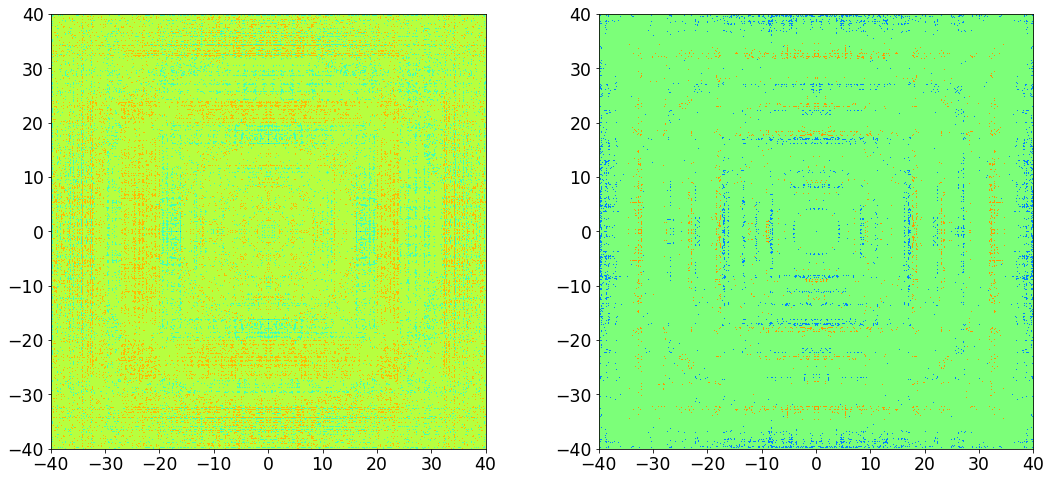

In [31]:
fig = plt.figure(figsize=(18,8))

# relative phase in hologram frame
ax1 = fig.add_subplot(121)

im1=ax1.imshow(f1,origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX),vmin=f1.min(),vmax=f1.max())


# relative phase in hologram frame
ax2 = fig.add_subplot(122)

im2=ax2.imshow(f2,origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX),vmin=f2.min(),vmax=f2.max())

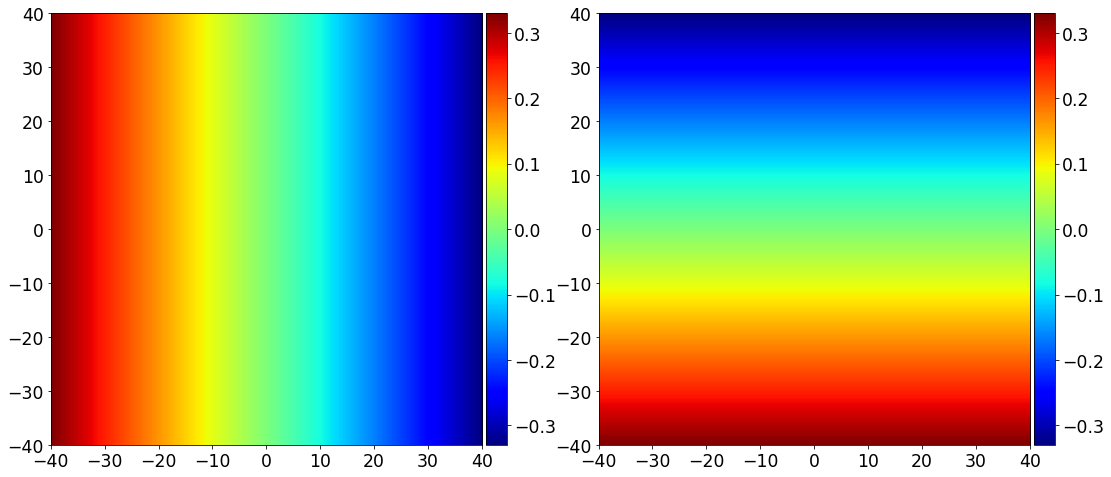

In [32]:
fig = plt.figure(figsize=(18,8))



# relative phase in hologram frame
ax1 = fig.add_subplot(121)
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)

im1=ax1.imshow(f3,origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX),vmin=f3.min(),vmax=f3.max())
cbar1=fig.colorbar(im1,cax=cax1)

# relative phase in hologram frame
ax2 = fig.add_subplot(122)
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)

im2=ax2.imshow(f4,origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX),vmin=f4.min(),vmax=f4.max())
cbar2=fig.colorbar(im2,cax=cax2)

### Constant relative phase or 3D- distance to sources 

In [33]:
Z_Phi_holo=dd_phi(XX,YY)

In [34]:
X_ccd = np.linspace(XMIN, XMAX, NPIX)
Y_ccd = np.linspace(YMIN, YMAX, NPIX)
XX_ccd, YY_ccd = np.meshgrid(X_ccd, Y_ccd, sparse=False)

# homothetie toward hologram plane
xx_holo=XYtoxy(XX_ccd,c_Z0) 
yy_holo=XYtoxy(YY_ccd,c_Z0) 
# homothetie of point Oh projected in hologram plane
x_Oh,y_Oh=XYtoxy_2D(c_X_Oh,c_Y_Oh,c_Z0)

# rotation from CCD orientation toward hologram 
(xx1_holo,yy1_holo)=xytox1y1_2D(xx_holo,yy_holo,c_beta0,x_Oh,y_Oh)
Z_Phi_ccd=dd_phi(xx1_holo,yy1_holo) # compute dispersion angle inside hologram frame

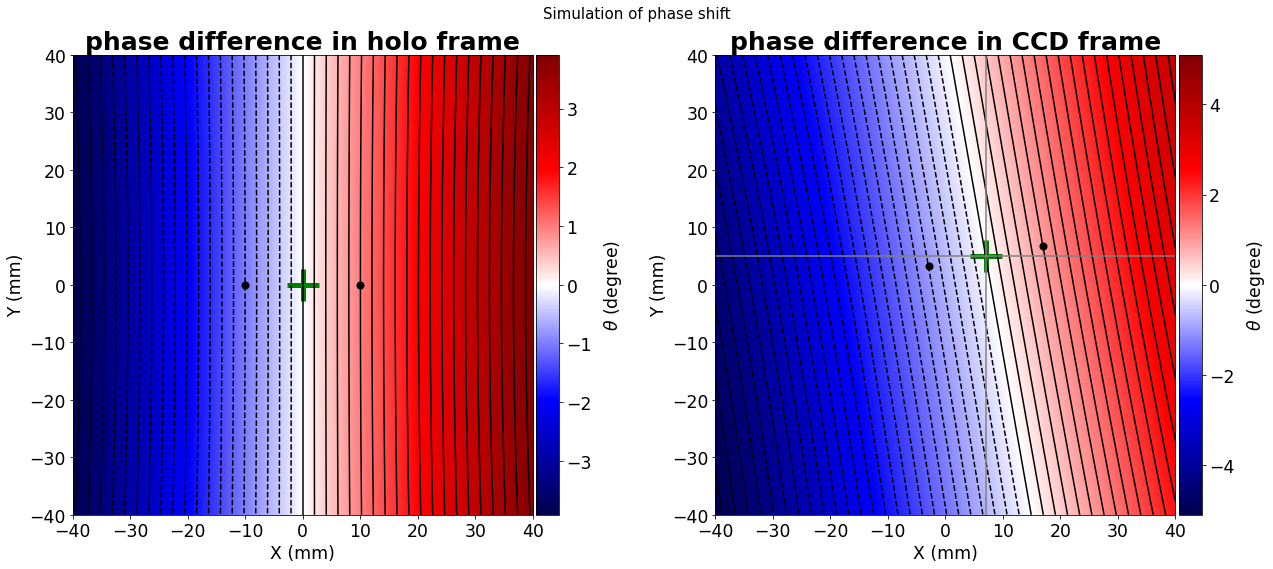

In [35]:
fig = plt.figure(figsize=(18,8))

# relative phase in hologram frame
ax1 = fig.add_subplot(121)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)


im1=ax1.imshow(Z_Phi_holo,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X,Y,Z_Phi_holo,levels=50,colors='k')
cbar1=fig.colorbar(im1,cax=cax1)

cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

xy1_A=np.array([-c_d1/2,0])
xy1_B=np.array([c_d1/2,0])
xy1_Oh=np.array([0,0])

ax1.scatter(xy1_A[0],xy1_A[1],marker="o",color="k",s=50)
ax1.scatter(xy1_B[0],xy1_B[1],marker="o",color="k",s=50)
ax1.scatter(xy1_Oh[0],xy1_Oh[1],marker="+",color="g",s=1000,lw=5)

ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("phase difference in holo frame",fontweight="bold",fontsize=25)


# relative phase difference in CCD frame when hologram is rotated by an angle beta
ax2 = fig.add_subplot(122)

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)
maxPhi=np.max(np.abs(Z_Phi_ccd))

im2=ax2.imshow(Z_Phi_ccd,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX),vmin=-maxPhi,vmax=maxPhi)
h2 = ax2.contour(X_ccd,Y_ccd,Z_Phi_ccd,levels=50,colors='k')
cbar2=fig.colorbar(im2,cax=cax2)

cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

# inverse rotation from hologram frame to frame in which axis are parralel in 
xy_A = x1y1toxy(xy1_A,c_beta0,x_Oh,y_Oh)
xy_B = x1y1toxy(xy1_B,c_beta0,x_Oh,y_Oh)
xy_Oh = x1y1toxy(xy1_Oh,c_beta0,x_Oh,y_Oh)

# inverse homothetie
XY_A = xytoXY(xy_A,c_Z0)
XY_B = xytoXY(xy_B,c_Z0)
XY_Oh = xytoXY(xy_Oh,c_Z0)

ax2.scatter(XY_A[0],XY_A[1],marker="o",color="k",s=50)
ax2.scatter(XY_B[0],XY_B[1],marker="o",color="k",s=50)
ax2.scatter(XY_Oh[0],XY_Oh[1],marker="+",color="g",s=1000,lw=5)

ax2.axvline(x=c_X_Oh,color="grey")
ax2.axhline(y=c_Y_Oh,color="grey")

ax2.set_xlabel("X (mm)")
ax2.set_ylabel("Y (mm)")
ax2.set_title("phase difference in CCD frame",fontweight="bold",fontsize=25)

plt.suptitle("Simulation of phase shift",fontsize=15)
plt.tight_layout()

### dispersion angle Alpha

In [36]:
Z_Ang_holo=dd_alpha(XX,YY)

In [37]:
X_ccd = np.linspace(XMIN, XMAX, NPIX)
Y_ccd = np.linspace(YMIN, YMAX, NPIX)
XX_ccd, YY_ccd = np.meshgrid(X_ccd, Y_ccd, sparse=False)

# homothetie toward hologram plane
xx_holo=XYtoxy(XX_ccd,c_Z0) 
yy_holo=XYtoxy(YY_ccd,c_Z0) 

# homothetie of point Oh in hologram plane
x_Oh,y_Oh=XYtoxy_2D(c_X_Oh,c_Y_Oh,c_Z0)

# rotation from CCD orientation toward hologram 
(xx1_holo,yy1_holo)=xytox1y1_2D(xx_holo,yy_holo,c_beta0,x_Oh,y_Oh)

# calcul of dispersion angle in hologram frame
Z_Ang_ccd=dd_alpha(xx1_holo,yy1_holo)

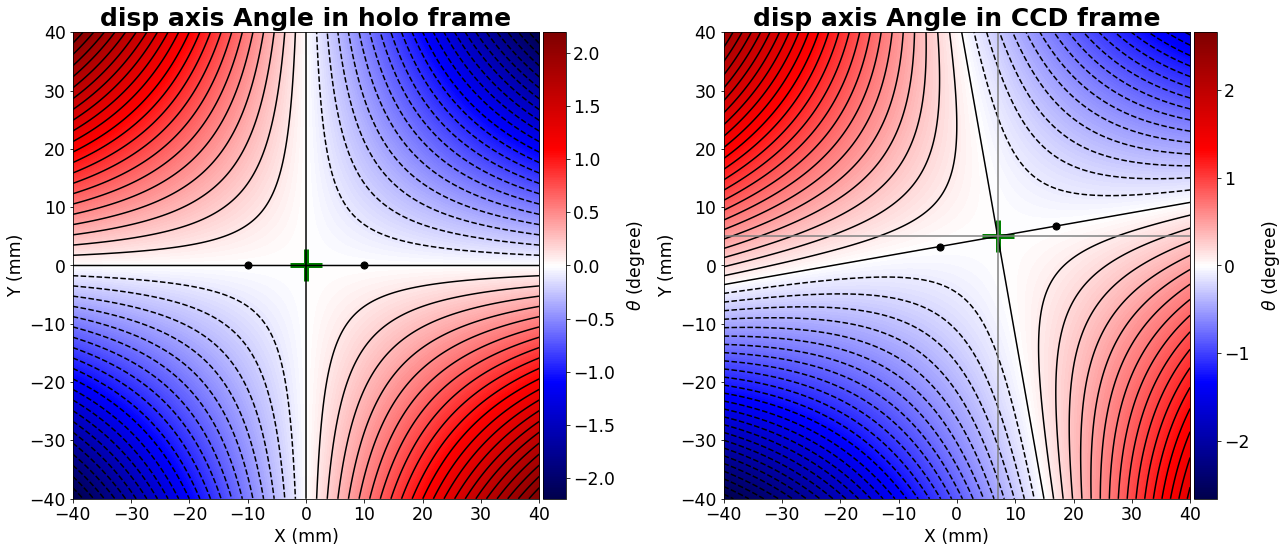

In [38]:
fig = plt.figure(figsize=(18,8))

# dispersion axis in hologram frame (Oh,x1,y1)

ax1 = fig.add_subplot(121)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)


im1=ax1.imshow(Z_Ang_holo,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X,Y,Z_Ang_holo,levels=50,colors='k')
cbar1=fig.colorbar(im1,cax=cax1)

cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

xy1_A=np.array([-c_d1/2,0])
xy1_B=np.array([c_d1/2,0])
xy1_Oh=np.array([0,0])

ax1.scatter(xy1_A[0],xy1_A[1],marker="o",color="k",s=50)
ax1.scatter(xy1_B[0],xy1_B[1],marker="o",color="k",s=50)
ax1.scatter(xy1_Oh[0],xy1_Oh[1],marker="+",color="g",s=1000,lw=5)

ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("disp axis Angle in holo frame",fontweight="bold",fontsize=25)

# dispersion angle in CCD frame (O,X,Y)

ax2 = fig.add_subplot(122)

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)

maxAng=np.max(np.abs(Z_Ang_ccd))
im2=ax2.imshow(Z_Ang_ccd,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX),vmin=-maxAng,vmax=maxAng)
h2 = ax2.contour(X_ccd,Y_ccd,Z_Ang_ccd,levels=50,colors='k')
cbar2=fig.colorbar(im2,cax=cax2)

cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

# inverse rotation
xy_A = x1y1toxy(xy1_A,c_beta0,x_Oh,y_Oh)
xy_B = x1y1toxy(xy1_B,c_beta0,x_Oh,y_Oh)
xy_Oh = x1y1toxy(xy1_Oh,c_beta0,x_Oh,y_Oh)

# inverse homothetie
XY_A = xytoXY(xy_A,c_Z0)
XY_B = xytoXY(xy_B,c_Z0)
XY_Oh = xytoXY(xy_Oh,c_Z0)

ax2.scatter(XY_A[0],XY_A[1],marker="o",color="k",s=50)
ax2.scatter(XY_B[0],XY_B[1],marker="o",color="k",s=50)
ax2.scatter(XY_Oh[0],XY_Oh[1],marker="+",color="g",s=1000,lw=5)

ax2.axvline(x=c_X_Oh,color="grey")
ax2.axhline(y=c_Y_Oh,color="grey")

ax2.set_xlabel("X (mm)")
ax2.set_ylabel("Y (mm)")
ax2.set_title("disp axis Angle in CCD frame",fontweight="bold",fontsize=25)


plt.tight_layout()

### Density of lines

In [146]:
Z_N_holo=N_density(XX,YY)

In [147]:
X_ccd = np.linspace(XMIN, XMAX, NPIX)
Y_ccd = np.linspace(YMIN, YMAX, NPIX)
XX_ccd, YY_ccd = np.meshgrid(X_ccd, Y_ccd, sparse=False)

# homothetie toward hologram plane
xx_holo=XYtoxy(XX_ccd,c_Z0) 
yy_holo=XYtoxy(YY_ccd,c_Z0) 
# homothetie of point Oh projected in hologram plane
x_Oh,y_Oh=XYtoxy_2D(c_X_Oh,c_Y_Oh,c_Z0)

# rotation from CCD orientation toward hologram 
(xx1_holo,yy1_holo)=xytox1y1_2D(xx_holo,yy_holo,c_beta0,x_Oh,y_Oh)
Z_N_ccd=N_density(xx1_holo,yy1_holo) # compute dispersion angle inside hologram frame

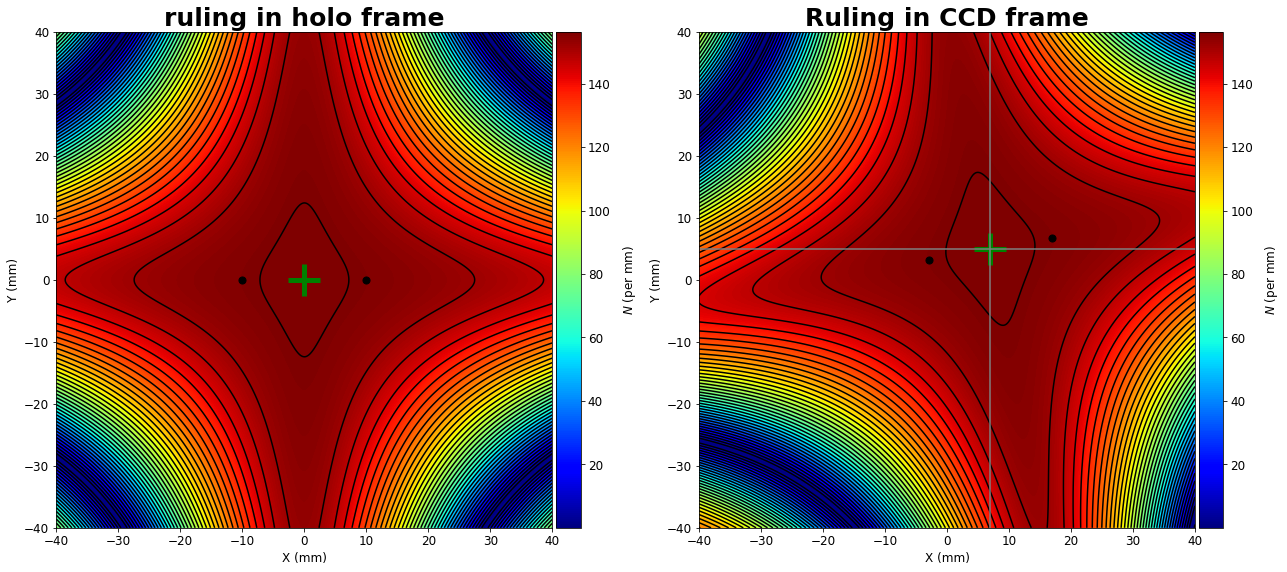

In [148]:
fig = plt.figure(figsize=(18,8))

# dispersion axis in hologram frame (Oh,x1,y1)

ax1 = fig.add_subplot(121)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)

maxN=np.max(Z_N_holo)
minN=np.min(Z_N_holo)


im1=ax1.imshow(Z_N_holo,origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X,Y,Z_N_holo,levels=50,colors='k')
cbar1=fig.colorbar(im1,cax=cax1)

cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$N$ (per mm)', rotation=90)

xy1_A=np.array([-c_d1/2,0])
xy1_B=np.array([c_d1/2,0])
xy1_Oh=np.array([0,0])

ax1.scatter(xy1_A[0],xy1_A[1],marker="o",color="k",s=50)
ax1.scatter(xy1_B[0],xy1_B[1],marker="o",color="k",s=50)
ax1.scatter(xy1_Oh[0],xy1_Oh[1],marker="+",color="g",s=1000,lw=5)

ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("ruling in holo frame",fontweight="bold",fontsize=25)

# dispersion angle in CCD frame (O,X,Y)

ax2 = fig.add_subplot(122)

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)

maxN=np.max(Z_N_ccd)
minN=np.min(Z_N_ccd)

im2=ax2.imshow(Z_N_ccd,origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX),vmin=minN,vmax=maxN)
h2 = ax2.contour(X_ccd,Y_ccd,Z_N_ccd,levels=50,colors='k')
cbar2=fig.colorbar(im2,cax=cax2)

cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('$N$ (per mm)', rotation=90)

# inverse rotation
xy_A = x1y1toxy(xy1_A,c_beta0,x_Oh,y_Oh)
xy_B = x1y1toxy(xy1_B,c_beta0,x_Oh,y_Oh)
xy_Oh = x1y1toxy(xy1_Oh,c_beta0,x_Oh,y_Oh)

# inverse homothetie
XY_A = xytoXY(xy_A,c_Z0)
XY_B = xytoXY(xy_B,c_Z0)
XY_Oh = xytoXY(xy_Oh,c_Z0)

ax2.scatter(XY_A[0],XY_A[1],marker="o",color="k",s=50)
ax2.scatter(XY_B[0],XY_B[1],marker="o",color="k",s=50)
ax2.scatter(XY_Oh[0],XY_Oh[1],marker="+",color="g",s=1000,lw=5)

ax2.axvline(x=c_X_Oh,color="grey")
ax2.axhline(y=c_Y_Oh,color="grey")

ax2.set_xlabel("X (mm)")
ax2.set_ylabel("Y (mm)")
ax2.set_title("Ruling in CCD frame",fontweight="bold",fontsize=25)


plt.tight_layout()

# Estimation of hologram parameters

## Random points

In [39]:
NumberofPoints=50
Nxsim=np.random.randint(NPIX, size=(NumberofPoints))
Nysim=np.random.randint(NPIX, size=(NumberofPoints))
Xsim=X_ccd[Nxsim]
Ysim=Y_ccd[Nysim]

## Simulated Measurement

In [40]:
sigma_alpha=0.01 # measurement error on angle in degree

In [41]:
# group the data points
XYsim=np.array(list(zip(Xsim,Ysim)))

In [42]:
# Apply homothetie from CCD plane to Hologram plane
xysim=XYtoxy(XYsim,c_Z0)

In [43]:
# apply true rotation to have coordinates in intrisic hologram frame
x1y1sim=np.zeros(xysim.shape)
for idx in np.arange(NumberofPoints):
    x1y1sim[idx,:]=xytox1y1(xysim[idx],c_beta0,x_Oh,y_Oh)

In [44]:
# calculate d_alpha for the data (in intrinsic hologram ref frame) in degree
d_alpha=dd_alpha(x1y1sim[:,0],x1y1sim[:,1])

In [45]:
# simulate measurement of angle in CCD frame
Zsim=c_beta0+d_alpha+np.random.normal(loc=0,scale=sigma_alpha)

In [46]:
Zerrsim=np.full(NumberofPoints,sigma_alpha)

## Plot simulated points

Text(0.5, 1.0, 'Simulation in CCD frame')

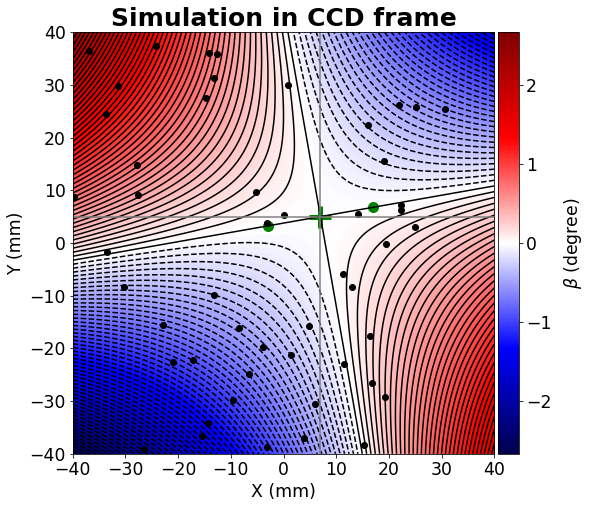

In [47]:
fig = plt.figure(figsize=(8,8))

ax2 = fig.add_subplot(111)

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)

maxAng=np.max(np.abs(Z_Ang_ccd))
im2=ax2.imshow(Z_Ang_ccd,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX),vmin=-maxAng,vmax=maxAng)
h2 = ax2.contour(X_ccd,Y_ccd,Z_Ang_ccd,levels=100,colors='k')
cbar2=fig.colorbar(im2,cax=cax2)

cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('$\\beta$ (degree)', rotation=90)

xy1_A=np.array([-c_d1/2,0])
xy1_B=np.array([c_d1/2,0])
xy1_Oh=np.array([0,0])

# inverse rotation
xy_A = x1y1toxy(xy1_A,c_beta0,x_Oh,y_Oh)
xy_B = x1y1toxy(xy1_B,c_beta0,x_Oh,y_Oh)
xy_Oh = x1y1toxy(xy1_Oh,c_beta0,x_Oh,y_Oh)

# inverse homothetie
XY_A = xytoXY(xy_A,c_Z0)
XY_B = xytoXY(xy_B,c_Z0)
XY_Oh = xytoXY(xy_Oh,c_Z0)

ax2.scatter(XY_A[0],XY_A[1],marker="o",color="g",s=100)
ax2.scatter(XY_B[0],XY_B[1],marker="o",color="g",s=100)
ax2.scatter(XY_Oh[0],XY_Oh[1],marker="+",color="g",s=500,lw=5)

ax2.scatter(X[Nxsim],Y[Nysim],marker="o",color="k")

ax2.axvline(x=c_X_Oh,color="grey")
ax2.axhline(y=c_Y_Oh,color="grey")

ax2.set_xlabel("X (mm)")
ax2.set_ylabel("Y (mm)")
ax2.set_title("Simulation in CCD frame",fontweight="bold",fontsize=25)


# Chi2 function

In [48]:
def chi2func(Xdata,Ydata,Zdata,Zerrdata,X0,Y0,beta,Z,Npar=2):
    """
    Total Chi2, do not divide by the number of data points 
    
    - input parameters
      - Xdata,Ydata :three 1D-numpy array: Xdata,Ydata coordinates of order zero, 
      - Zdata : angle measured in degree
      - Zerrdata : error on angle
      - X0,Y0 2 2D numpy arrays of unknown parameters to fit (optical center of hologram in CCD frame)
      - beta, rotation
      - Z distance holo - CCD
     
      - Npar : number of parameter to use in degrees of freedom
      
    - ouput
     - 2D numpy array of chi2 representing the chi2
     
    """
    
   
    N=len(Xdata)
    chi2=0
 
    # loop on data
    for idx in np.arange(N):
        
        X=Xdata[idx] # scalar
        Y=Ydata[idx]
        
        XY=np.array([X,Y])
        
        # homothecie according with homothetie
        xy=XYtoxy(XY,Z)
        x0,y0=XYtoxy_2D(X0,Y0,Z)
          
        # rotation according the beta assumption
        x1y1=xytox1y1(xy,beta,x0,y0)

        #calculation of dispersion angle in hologram frame according the model
        d_alpha=dd_alpha(x1y1[0],x1y1[1])
        

        # total angle in the model in CCD frame
        angle_mod=beta+d_alpha
        
        #angle measured in CCD frame
        angle_mes=Zdata[idx]
    
        # error
        sig=Zerrdata[idx]
    
        if sig!=0:
            chi2+=(angle_mod-angle_mes)**2/sig**2
        
        
    return chi2 

# Quantiles

In [49]:
from scipy.stats import chi2

In [50]:
CL=np.array([0.683,0.9,0.95,0.99])
Qcolors=["r","m","orange","yellow"]

In [51]:
NDF=2

In [52]:
Q=chi2.ppf(CL,df=NDF)

In [53]:
Q

array([2.29770701, 4.60517019, 5.99146455, 9.21034037])

Text(0.5, 1.0, 'distrib of holo angle')

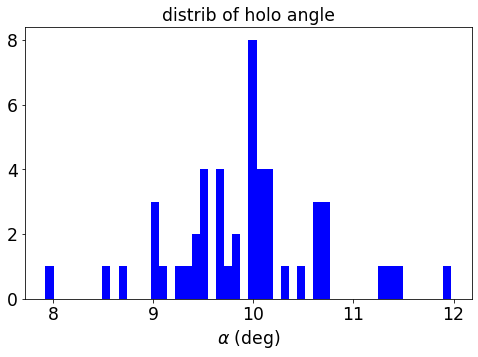

In [54]:
fig = plt.figure(figsize=(8,5))
ax=fig.add_subplot(111)
ax.hist(Zsim,bins=50,facecolor="b");
ax.set_xlabel("$\\alpha$ (deg)")
ax.set_title("distrib of holo angle")

## Calculation of chi2

In [55]:
#def chi2(Xdata,Ydata,Zdata,X0,Y0,alpha,Z,sig,Npar=2)
#def chi2(Xdata,Ydata,Zdata,X0,Y0,alpha,Z,sig,Npar)
the_chi2=chi2func(Xsim,Ysim,Zsim,Zerrsim,XX_ccd,YY_ccd,c_beta0,c_Z0,Npar=2)

## Plot

In [56]:
import matplotlib.ticker                         # here's where the formatter is
cbformat = matplotlib.ticker.ScalarFormatter()   # create the formatter
cbformat.set_powerlimits((-1,1)) 

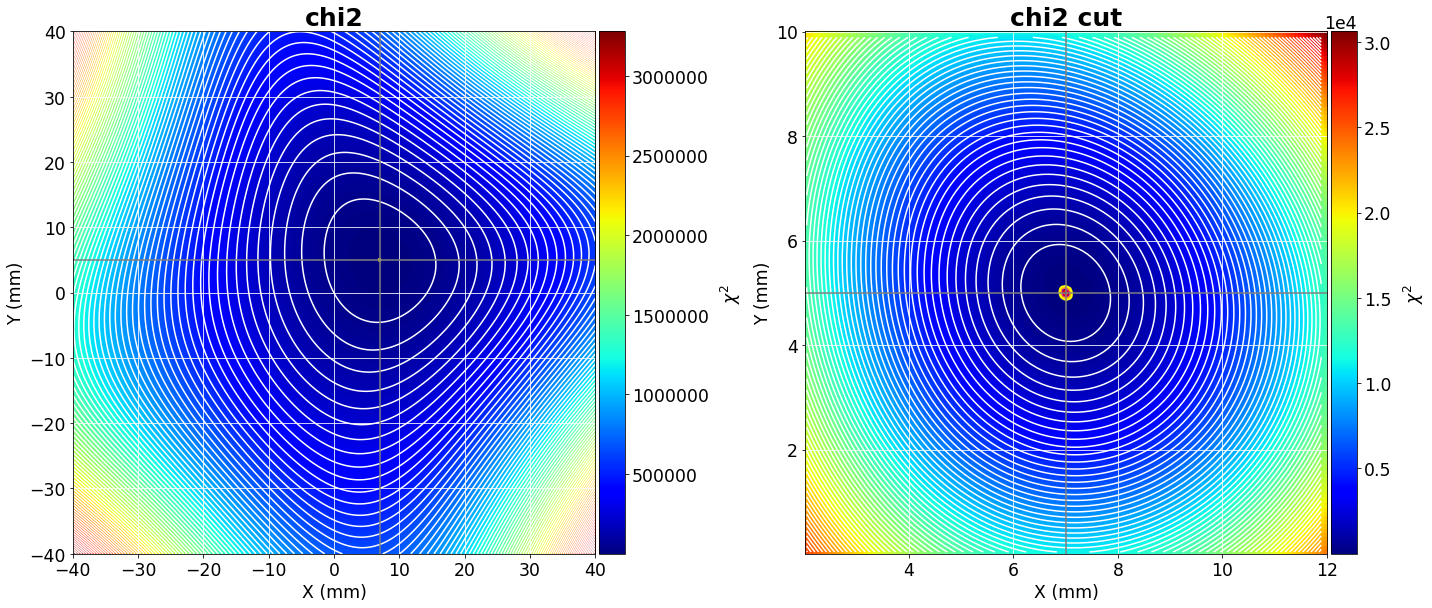

In [57]:
fig = plt.figure(figsize=(20,10))

###### full chi2

ax1 = fig.add_subplot(121)
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)

the_chi2min=the_chi2.min()
the_levels= the_chi2min + Q

im1=ax1.imshow(the_chi2,origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=100,colors='w')
h1b = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=the_levels,colors=Qcolors,linewidths=2)
cbar1=fig.colorbar(im1,cax=cax1,format=cbformat)
cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$\\chi^2$', rotation=90)
ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("chi2",fontweight="bold",fontsize=25)
ax1.grid(color="w")

idx_y_chi2min,idx_x_chi2min=np.where(the_chi2==the_chi2min)

x_chi2min=X_ccd[idx_x_chi2min][0]
y_chi2min=Y_ccd[idx_y_chi2min][0]

ax1.axvline(x=c_X_Oh,color="grey")
ax1.axhline(y=c_Y_Oh,color="grey")


###### chi2 Zoom

ax2 = fig.add_subplot(122)
xmin=x_chi2min-5
xmax=x_chi2min+5
ymin=y_chi2min-5
ymax=y_chi2min+5

ibinx=np.where(np.logical_and(X_ccd>=xmin,X_ccd<=xmax))[0]
ibiny=np.where(np.logical_and(Y_ccd>=ymin,X_ccd<=ymax))[0]
chi2_cut=the_chi2[ibiny.min():ibiny.max(), ibinx.min():ibinx.max()]
X_cut=X[ibinx.min():ibinx.max()]
Y_cut=X[ibiny.min():ibiny.max()]


divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)
im2=ax2.imshow(chi2_cut,origin="lower",cmap="jet",extent=(xmin,xmax,ymin,ymax))
h2 = ax2.contour(X_cut,Y_cut,chi2_cut,levels=100,colors='w')
h2b = ax2.contour(X_cut,Y_cut,chi2_cut,levels=the_levels,colors=Qcolors,linewidths=2)
cbar2=fig.colorbar(im2,cax=cax2,format=cbformat)
cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('$\\chi^2$', rotation=90)
ax2.set_xlabel("X (mm)")
ax2.set_ylabel("Y (mm)")
ax2.set_title("chi2 cut",fontweight="bold",fontsize=25)
ax2.axvline(x=c_X_Oh,color="grey")
ax2.axhline(y=c_Y_Oh,color="grey")
ax2.grid(color="w")

plt.tight_layout()
plt.show()

# Parameter Grid

In [58]:
plt.rcParams["axes.labelsize"] = 'large'
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['xtick.labelsize']= 'large'
plt.rcParams['ytick.labelsize']= 'large'

In [59]:
Ncol=4
Nrow=4
Nbeta=Nrow*Ncol
beta_range=5
beta_min=c_beta0-beta_range
beta_max=c_beta0+beta_range
beta_step=(beta_max-beta_min)/Nbeta
beta_values=np.linspace(beta_min,beta_max,Nbeta)

Text(0.5, 1, 'Simulation : hologram parameter search')

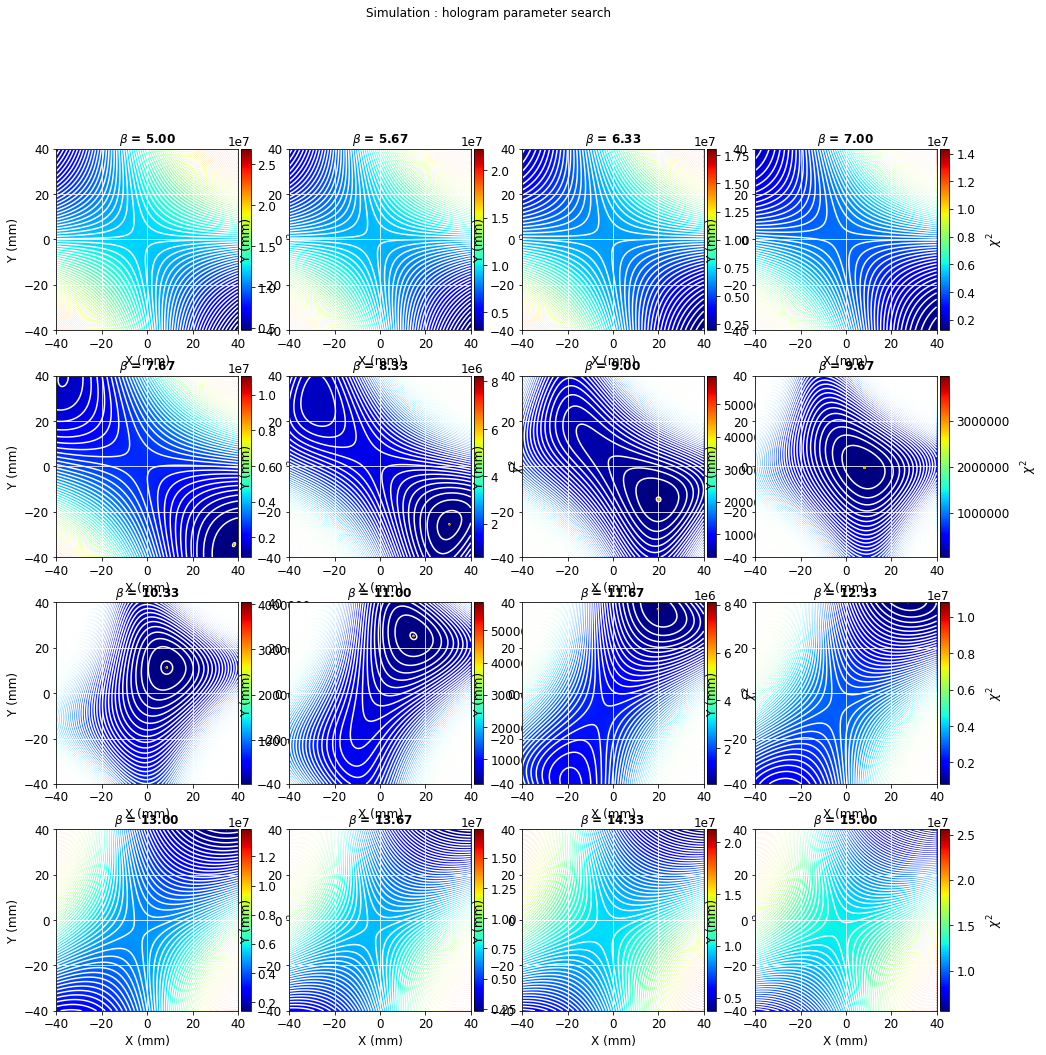

In [60]:
fig = plt.figure(figsize=(16,16))
the_chi2min=np.zeros(Nbeta)
the_locchi2min = []
# loop on beta angle
for idx in np.arange(Nbeta):
    ax1=fig.add_subplot(Nrow,Ncol,idx+1)
    the_chi2=chi2func(Xsim,Ysim,Zsim,Zerrsim,XX_ccd,YY_ccd,beta_values[idx],c_Z0,Npar=2)
    the_chi2min[idx]=the_chi2.min()  # value of chi2min
    the_levels= the_chi2min[idx] + Q
    the_locchi2min.append(np.where(the_chi2==the_chi2.min())) # location of chi2min 
    
    divider = make_axes_locatable(ax1)
    cax1 = divider.append_axes('right', size='5%', pad=0.05)
    
    
    im1=ax1.imshow(the_chi2,origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX))
    h1 = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=100,colors='w')
    h1b = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=the_levels,colors=Qcolors,linewidths=2)
    cbar1=fig.colorbar(im1,cax=cax1,format=cbformat)
    cbar1.ax.get_yaxis().labelpad = 10
    cbar1.ax.set_ylabel('$\\chi^2$', rotation=90)
    ax1.set_xlabel("X (mm)")
    ax1.set_ylabel("Y (mm)")
    title="$\\beta$ = {:3.2f}".format(beta_values[idx])
    ax1.set_title(title,fontweight="bold")
    ax1.grid(color="w")
    
plt.suptitle("Simulation : hologram parameter search",y=1)
#plt.tight_layout()


In [61]:
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [62]:
the_chi2min = the_chi2min/NumberofPoints

Text(0.5, 1.0, '$simulation : \\chi^2$ per degree of freedom vs holo angle $\\beta$')

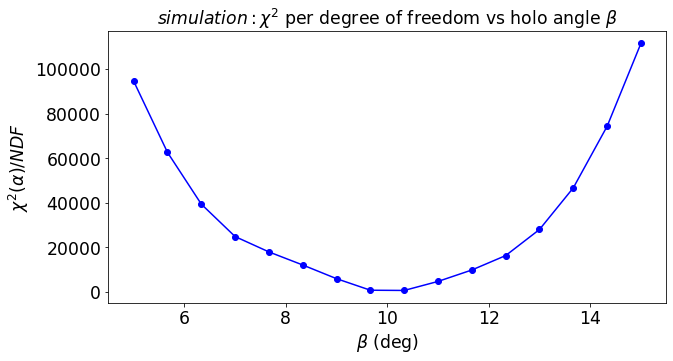

In [63]:
fig = plt.figure(figsize=(10,5))
ax=fig.add_subplot(111)
ax.plot(beta_values,the_chi2min,'bo-')
ax.set_xlabel("$\\beta$ (deg)")
ax.set_ylabel("$\\chi^2(\\alpha)/NDF$")
ax.set_title("$simulation : \chi^2$ per degree of freedom vs holo angle $\\beta$")

### Find where we have the chi2 min

In [64]:
the_chi2min.min()

714.3196818515398

In [65]:
idx_min=np.where(the_chi2min==the_chi2min.min())[0][0]
idx_min

8

In [66]:
found_angle_1=beta_values[idx_min]
found_angle_1

10.333333333333332

In [67]:
idx_chi2min_y,idx_chi2min_x=the_locchi2min[idx_min]

In [68]:
X_ccd[idx_chi2min_x][0]

8.688688688688686

In [69]:
Y_ccd[idx_chi2min_y][0]

11.331331331331334

# With AuxTel data

In [70]:
from IPython.display import Image
#Image(filename='figures/amas_ouvert.png') 

In [71]:
#Image(filename='figures/AmasOuvert_holophilines.png')

## read excel file

In [72]:
GOOGLE_COLAB = False

In [73]:
if GOOGLE_COLAB:
    from google.colab import files

    uploaded = files.upload()

    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

    filedata="orientations-holo_auxtel_v6.xlsx"
    df=pd.read_excel(filedata,index_col=None,header=42)

else:

    version="v9"
    if version=="v3":
        filedata="../data/orientations/orientations-holo_auxtel_v3.xlsx"
        df=pd.read_excel(filedata,index_col=None,header=17)
        df=df[df.index>24]
    elif version=="v5":
        filedata="../data/orientations/orientations-holo_auxtel_v5.xlsx"
        df=pd.read_excel(filedata,index_col=None,header=42)
    elif version=="v6":
        filedata="../data/orientations/orientations-holo_auxtel_v6.xlsx"
        df=pd.read_excel(filedata,index_col=None,header=42)    
    elif version=="v7":
        filedata="../data/orientations/orientations-holo_auxtel_v7.xlsx"
        df=pd.read_excel(filedata,index_col=None,header=42)  
    elif version=="v8":
        filedata="../data/orientations/orientations-holo_auxtel_v8.xlsx"
        df=pd.read_excel(filedata,index_col=None,header=42) 
    elif version=="v9":
        filedata="../data/orientations/orientations-holo_auxtel_v9.xlsx"
        df=pd.read_excel(filedata,index_col=None,header=42) 
    else:
        df=pd.read_excel(filedata,index_col=None,header=17)

In [74]:
df

précision 1pix  Unnamed: 1    Xp    Yp    Xq    Yq    Xc    Yc   Xhp  \
0              NaN         101   264   101   302  3974   216  1824 -1899   
1              NaN         102  1540   746  1557  3937  1348   760 -1254   
2              NaN         103  2534    28  2542  3986  2217  2282 -1972   
3              NaN         104  3179  1269  3186  3993  2795  1269  -731   
4              NaN         106  3540    28  3540  3922  3092  1551 -1972   
5              NaN         114  3720    45  3710  3981  3265  2271 -1955   
6              NaN         117  2515   485  2532  3969  2195   485 -1515   
7              NaN         119   156    21   199  3985   116  2309 -1979   
8              NaN         122   341     2   381  3329   317  3329 -1998   
9              NaN         125  2639    72  2644  3998  2321  2721 -1928   
10             NaN         126  4371   733  4355  3984  3847  2629 -1267   
11             NaN         127  3608    23  3600  3990  3156  2194 -1977   
12             NaN         115  4352  1254  4358  3988  3840  1254  -746   
13             NaN         128  3929   711  3912  3289  3464  3289 -1289   
14             NaN         120   282   648   298  3355   218   642 -1352   
15             NaN         116  3820   605  3829  2971  3372   605 -1395   
16             NaN         121  1103    21  1126  3982   983  1576 -1979   
17             NaN         110  2739  1100  2739  3303  2419  3303  -900   

     Yhp  ...   Yhq   Xhc   Yhc    Dx  Dy     alpha  X(mm)  Y(mm)     degré  \
0   1736  ...  1698  -176  1784  3873 -38 -0.009811  -1.76  17.84 -0.562141   
1    460  ...   443 -1240   652  3191 -17 -0.005327 -12.40   6.52 -0.305240   
2   -534  ...  -542   282  -217  3958  -8 -0.002021   2.82  -2.17 -0.115807   
3  -1179  ... -1186  -731  -795  2724  -7 -0.002570  -7.31  -7.95 -0.147236   
4  -1540  ... -1540  -449 -1092  3894   0  0.000000  -4.49 -10.92  0.000000   
5  -1720  ... -1710   271 -1265  3936  10  0.002541   2.71 -12.65  0.145568   
6   -515  ...  -532 -1515  -195  3484 -17 -0.004879 -15.15  -1.95 -0.279570   
7   1844  ...  1801   309  1884  3964 -43 -0.010847   3.09  18.84 -0.621499   
8   1659  ...  1619  1329  1683  3327 -40 -0.012022  13.29  16.83 -0.688826   
9   -639  ...  -644   721  -321  3926  -5 -0.001274   7.21  -3.21 -0.072970   
10 -2371  ... -2355   629 -1847  3251  16  0.004922   6.29 -18.47  0.281983   
11 -1608  ... -1600   194 -1156  3967   8  0.002017   1.94 -11.56  0.115545   
12 -2352  ... -2358  -746 -1840  2734  -6 -0.002195  -7.46 -18.40 -0.125740   
13 -1929  ... -1912  1289 -1464  2578  17  0.006594  12.89 -14.64  0.377818   
14  1718  ...  1702 -1358  1782  2707 -16 -0.005911 -13.58  17.82 -0.338649   
15 -1820  ... -1829 -1395 -1372  2366  -9 -0.003804 -13.95 -13.72 -0.217946   
16   897  ...   874  -424  1017  3961 -23 -0.005807  -4.24  10.17 -0.332691   
17  -739  ...  -739  1303  -419  2203   0  0.000000  13.03  -4.19  0.000000   

      dalpha  
0   0.059175  
1   0.071822  
2   0.057904  
3   0.084135  
4   0.058855  
5   0.058227  
6   0.065782  
7   0.057816  
8   0.068886  
9   0.058376  
10  0.070496  
11  0.057772  
12  0.083827  
13  0.088900  
14  0.084663  
15  0.096865  
16  0.057860  
17  0.104032  

[18 rows x 21 columns]

### Drop some points

In [75]:
#df.drop(df.index[[0]],inplace=True)

In [76]:
#df

In [77]:
filedata

'../data/orientations/orientations-holo_auxtel_v9.xlsx'

In [78]:
df.index

RangeIndex(start=0, stop=18, step=1)

In [79]:
df.columns

Index(['précision 1pix', 'Unnamed: 1', 'Xp', 'Yp', 'Xq', 'Yq', 'Xc', 'Yc',
       'Xhp', 'Yhp', 'Xhq', 'Yhq', 'Xhc', 'Yhc', 'Dx', 'Dy', 'alpha', 'X(mm)',
       'Y(mm)', 'degré', 'dalpha'],
      dtype='object')

## Erreur expérimentale

In [80]:
#sigma_alpha_exp=0.04 # error on angles
sigma_alpha_exp=0.08 # error on angles

### Show columns

In [81]:
df.columns

Index(['précision 1pix', 'Unnamed: 1', 'Xp', 'Yp', 'Xq', 'Yq', 'Xc', 'Yc',
       'Xhp', 'Yhp', 'Xhq', 'Yhq', 'Xhc', 'Yhc', 'Dx', 'Dy', 'alpha', 'X(mm)',
       'Y(mm)', 'degré', 'dalpha'],
      dtype='object')

### Extract good columns

In [82]:
if version=="v6" or version == "v7" or version == "v8" or version == "v9":
    df=df[['X(mm)', 'Y(mm)','degré','dalpha']]
else:
    df=df[['X(mm)', 'Y(mm)','degré']]

In [83]:
df.columns

Index(['X(mm)', 'Y(mm)', 'degré', 'dalpha'], dtype='object')

### Describe

In [84]:
df.describe()

X(mm)      Y(mm)      degré     dalpha
count  18.000000  18.000000  18.000000  18.000000
mean   -0.948333  -1.767222  -0.160411   0.071411
std     9.484197  13.191981   0.294139   0.015217
min   -15.150000 -18.470000  -0.688826   0.057772
25%    -7.422500 -12.377500  -0.325828   0.058265
50%     0.090000  -3.700000  -0.136488   0.067334
75%     5.490000   9.257500   0.000000   0.084058
max    13.290000  18.840000   0.377818   0.104032

## Extract data

In [85]:
NumberofPointsData=len(df)

Xdata=df["X(mm)"].values
Ydata=df["Y(mm)"].values
alphadata=df["degré"].values
if version == "v6" or version == "v7" or version == "v8" or version == "v9":
    alphaerrdata=df["dalpha"].values
else:
    alphaerrdata=np.full(NumberofPointsData,sigma_alpha_exp)

Text(0.5, 0, '$\\alpha$ (deg)')

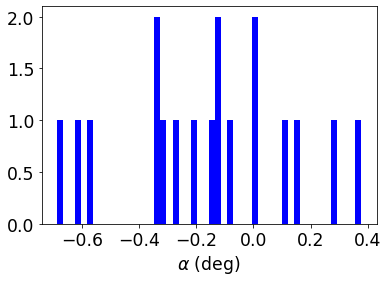

In [86]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(111)
ax.hist(alphadata,bins=50,facecolor="b");
ax.set_xlabel('$\\alpha$ (deg)')

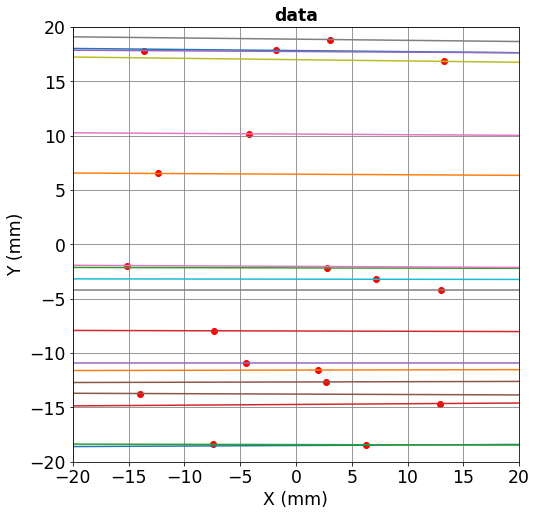

In [87]:
slope_mag=1
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
for idx in np.arange(NumberofPointsData):
    x_i=Xdata[idx]
    y_i=Ydata[idx]
    slope=np.tan(alphadata[idx]*u_degtorad)
    
    slope*=slope_mag
    
    ax.scatter(x_i,y_i,marker="o",color="r")
    x_1=-20
    x_2=20
    y_1=(x_1-x_i)*slope+y_i
    y_2=(x_2-x_i)*slope+y_i
    ax.plot([x_1,x_2],[y_1,y_2])
    
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)

ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
title="data"
ax.set_title(title,fontweight="bold")
ax.grid(color="grey")
     

## Keep first hypothesis on rotation angle from data

- keep the average angle

In [88]:
assummed_angle_0=df.mean()["degré"]
assummed_angle_0

-0.16041114977499982

## Parameter grid for parameter search

In [89]:
plt.rcParams["axes.labelsize"] = 'large'
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['xtick.labelsize']= 'large'
plt.rcParams['ytick.labelsize']= 'large'

In [90]:
def StepOptimization(stepnum,beta_center,beta_range):
    """
    StepOptimization(step_num,beta_center,beta_range)
    
    - input parameters
    
    step_num :    step num
    beta_center : beta center
    beta_range :  beta range
    
    - output parameter
    
    * X0_found
    * Y0_found
    * found_angle
    
    
    """
    
    plt.rcParams["axes.labelsize"] = 'large'
    plt.rcParams['axes.titlesize'] = 'large'
    plt.rcParams['xtick.labelsize']= 'large'
    plt.rcParams['ytick.labelsize']= 'large'
    
    Ncol=5
    Nrow=5
    Nbeta=Nrow*Ncol
    
    beta_min=beta_center-beta_range
    beta_max=beta_center+beta_range
    beta_step=(beta_max-beta_min)/Nbeta
    beta_values=np.linspace(beta_min,beta_max,Nbeta)
    
    
    ########### Fig 1
    fig = plt.figure(figsize=(16,16))
    the_chi2min=np.zeros(Nbeta) # minimum value
    the_locchi2min=[] # location of minimum
    # loop on beta angle
    for idx in np.arange(Nbeta):
        ax1=fig.add_subplot(Nrow,Ncol,idx+1)
        the_chi2=chi2func(Xdata,Ydata,alphadata,alphaerrdata,XX_ccd,YY_ccd,beta_values[idx],c_Z0,Npar=2)
        the_chi2min[idx]=the_chi2.min()    # the minimum of chi2
        the_levels= the_chi2min[idx] + Q
        the_locchi2min.append(np.where(the_chi2==the_chi2.min())) # location of chi2min 
    
        divider = make_axes_locatable(ax1)
        cax1 = divider.append_axes('right', size='5%', pad=0.05)
        im1=ax1.imshow(the_chi2,origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX))
        h1 = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=100,colors='w') 
        h1b = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=the_levels,colors=Qcolors,linewidths=2)
        cbar1=fig.colorbar(im1,cax=cax1,format=cbformat)
        cbar1.ax.get_yaxis().labelpad = 10
        cbar1.ax.set_ylabel('$\\chi^2$', rotation=90)
        ax1.set_xlabel("X (mm)")
        ax1.set_ylabel("Y (mm)")
        title="$\\beta$ = {:3.2f}".format(beta_values[idx])
        ax1.set_title(title,fontweight="bold")
        ax1.grid(color="w")
    
    plt.suptitle("AuxTel Data : hologram parameters search, step {}".format(stepnum),y=1,fontsize=15)
    
    plt.show()
    
    ################# Fig 2
    
    plt.rcParams["axes.labelsize"] = 'xx-large'
    plt.rcParams['axes.titlesize'] = 'xx-large'
    plt.rcParams['xtick.labelsize']= 'xx-large'
    plt.rcParams['ytick.labelsize']= 'xx-large'
    
    the_chi2min=the_chi2min/NumberofPointsData
    
    
    fig = plt.figure(figsize=(10,5))
    ax=fig.add_subplot(111)
    ax.plot(beta_values,the_chi2min,'bo-')
    ax.set_xlabel("$\\beta$ (deg)")
    ax.set_ylabel("$\\chi^2(\\beta)$")
    ax.set_title("Auxtel data, step {} : $\chi^2$ vs holo angle $\\beta$".format(stepnum))
    plt.show()
    
    
    idx_min=np.where(the_chi2min==the_chi2min.min())[0][0]
    found_angle=beta_values[idx_min]
    idx_chi2min_y,idx_chi2min_x=the_locchi2min[idx_min]
    X0_found=X_ccd[idx_chi2min_x][0]
    Y0_found=Y_ccd[idx_chi2min_y][0]
    
    
    #########  Fig 3
    
    the_chi2=chi2func(Xdata,Ydata,alphadata,alphaerrdata,XX_ccd,YY_ccd,found_angle,c_Z0,Npar=2)
    
    
    fig = plt.figure(figsize=(10,10))


    ax1 = fig.add_subplot(111)
    divider = make_axes_locatable(ax1)
    cax1 = divider.append_axes('right', size='5%', pad=0.05)

    the_chi2min=the_chi2.min()    # the minimum of chi2
    the_levels= the_chi2min + Q
    
    im1=ax1.imshow(the_chi2,origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX))
    h1 = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=100,colors='w')
    #h1b = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=[2.30+the_chi2.min()],colors='r',linewidths=2)
    h1b = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=the_levels,colors=Qcolors,linewidths=2)

    cs = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=[the_levels[0]],colors=Qcolors[0],linewidths=2)

    # extraction of the point of the contour at 1 sigma 
    p = cs.collections[0].get_paths()[0]
    v = p.vertices
    xcont = v[:,0]
    ycont = v[:,1]
    
    
    cbar1=fig.colorbar(im1,cax=cax1,format=cbformat)
    cbar1.ax.get_yaxis().labelpad = 10
    cbar1.ax.set_ylabel('$\\chi^2$', rotation=90)
    ax1.set_xlabel("X (mm)")
    ax1.set_ylabel("Y (mm)")
    ax1.set_title("chi2, step {}".format(stepnum),fontweight="bold",fontsize=25)
    ax1.grid(color="w")


    ax1.scatter(X0_found,Y0_found,marker="o",color="y",s=100)
    ax1.scatter(Xdata,Ydata,marker="o",color="gray")

    plt.show()
    
    
    ########## Fig 4
    
    # homothetie toward hologram plane
    xx_holo=XYtoxy(XX_ccd,c_Z0) 
    yy_holo=XYtoxy(YY_ccd,c_Z0) 
    # homothetie of point Oh projected in hologram plane
    x_Oh,y_Oh=XYtoxy_2D(X0_found,Y0_found,c_Z0)

    # rotation from CCD orientation toward hologram orientation within hologram plane
    (xx1_holo,yy1_holo)=xytox1y1_2D(xx_holo,yy_holo,found_angle,x_Oh,y_Oh)
    Z_Phi_ccd=dd_phi(xx1_holo,yy1_holo) # compute dispersion angle inside hologram frame
    maxZ_Phi=np.max(np.abs(Z_Phi_ccd))
    
    
    fig=plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111)
    for idx in np.arange(NumberofPointsData):
        x_i=Xdata[idx]
        y_i=Ydata[idx]
        slope=np.tan(alphadata[idx]*u_degtorad)
        ax.scatter(x_i,y_i,marker="o",color="g")
        x_1=-20
        x_2=20
        y_1=(x_1-x_i)*slope+y_i
        y_2=(x_2-x_i)*slope+y_i
        ax.plot([x_1,x_2],[y_1,y_2],"g-",lw=3)
    
    
    im=ax.imshow(Z_Phi_ccd,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX),alpha=0.5,vmin=-maxZ_Phi,vmax=maxZ_Phi)
    h = ax.contour(X_ccd,Y_ccd,Z_Phi_ccd,levels=50,colors='k')

    # inverse rotation of point sources
    xy_A = x1y1toxy(xy1_A,found_angle,X0_found,Y0_found)
    xy_B = x1y1toxy(xy1_B,found_angle,X0_found,Y0_found)

    # homothetie from hologram plane to CCD plne
    XY_A = xytoXY(xy_A,c_Z0)
    XY_B = xytoXY(xy_B,c_Z0)

    # draw points A,B , Oh
    ax.scatter(XY_A[0],XY_A[1],marker="o",color="k",s=100)
    ax.scatter(XY_B[0],XY_B[1],marker="o",color="k",s=100)
    ax.scatter(X0_found,Y0_found,marker="+",color="b",s=5000)


    
    # center contour line
    ax.plot(xcont,ycont,'r-')
    
    
    ax.set_xlim(-25,25)
    ax.set_ylim(-25,25)

    ax.set_xlabel("X (mm)")
    ax.set_ylabel("Y (mm)")
    title="fit data step : {} : alpha= {:3.2f} deg , (X0,Y0)= ({:3.2f},{:3.2f})".format(stepnum,found_angle,X0_found,Y0_found)
    ax.set_title(title,fontweight="bold")
    #ax.grid(color="w")
    
    plt.show()
    
    
    ###############
    
    print(" step {} : ({:3.3f},{:3.3f}) angle={:3.3f}, chi2= {:3.3f}".format(stepnum,X0_found,Y0_found,found_angle,the_chi2min))
    
    
    return(X0_found,Y0_found,found_angle,the_chi2min)
    
    

### Step 1

In [91]:
if FLAG_STEPOPTIMIZE:
    X0_found_1,Y0_found_1,found_angle_1,the_chi2min_1=StepOptimization(1,assummed_angle_0,10.)

### Step 2

In [92]:
if FLAG_STEPOPTIMIZE:
    X0_found_2,Y0_found_2,found_angle_2,the_chi2min_2=StepOptimization(2,found_angle_1,1.)

### Step 3

In [93]:
if FLAG_STEPOPTIMIZE:
    X0_found_3,Y0_found_3,found_angle_3,the_chi2min_3=StepOptimization(3,found_angle_2,0.2)

# Final Fit with iMinuit

https://nbviewer.jupyter.org/github/scikit-hep/iminuit/blob/master/tutorial/basic_tutorial.ipynb

In [94]:
if GOOGLE_COLAB:
    !pip install iminuit

In [95]:
# everything in iminuit is done through the Minuit object, so we import it
from iminuit import Minuit

# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares

In [96]:
def chi2_angle(X0,Y0,beta0):
    """
    - input x,y : model X0,Y0 in  CCD frame
    - beta    : rotation angle
    
    """
    
    N=len(Xdata)
    chi2=0
 
    # loop on data
    for idx in np.arange(N):
               
        X=Xdata[idx] # scalar
        Y=Ydata[idx]
        
        XY=np.array([X,Y])
        
        # homothecie according the Z assumption (distance hologram - CCD)
        xy=XYtoxy(XY,c_Z0)
        x0,y0=XYtoxy_2D(X0,Y0,c_Z0)
    
        # rotation according the beta assumption
        x1y1=xytox1y1(xy,beta0,x0,y0)
        
        # calculation of angle alpha
        d_alpha=dd_alpha(x1y1[0],x1y1[1])
        
        
        # angle in the model
        angle_mod=beta0+d_alpha
        
        #angle measured
        angle_mes=alphadata[idx]
    
        # error
        sig=alphaerrdata[idx]
        
        if sig>0:
            chi2+=(angle_mod-angle_mes)**2/sig**2
        
    return chi2

In [97]:
X0_th=-7.0
Y0_th=+2.5
beta_th=0

In [98]:
#m = Minuit(chi2_angle, X0=X0_found_3, Y0=Y0_found_3, alpha0=found_angle_3)  # starting values
m = Minuit(chi2_angle, X0=X0_th, Y0=Y0_th, beta0=beta_th)  # starting values

In [99]:
m.errordef=1

In [100]:
#m.limits = [(-20, 20), (-20, 10),(alpha_min,alpha_max)]

In [101]:
m.migrad()  # finds minimum of least_squares function

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 7.658                      │              Nfcn = 79               │
│ EDM = 6.87e-06 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ X0    │   -14.1   │    0.9    │            │            │         │         │       │
│ 1 │ Y0    │    4.3    │    1.4    │            │            │         │         │       │
│ 2 │ beta0 │  -0.275   │   0.032   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────┐
│       │       X0       Y0    beta0 │
├───────┼────────────────────────────┤
│    X0 │    0.803   0.0542  0.00428 │
│    Y0 │   0.0542     2.04  -0.0379 │
│ beta0 │  0.00428  -0.0379 0.000993 │
└───────┴────────────────────────────┘

In [102]:
m.hesse()   # accurately computes uncertainties

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 7.658                      │              Nfcn = 95               │
│ EDM = 6.87e-06 (Goal: 0.1)       │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ X0    │   -14.1   │    0.9    │            │            │         │         │       │
│ 1 │ Y0    │    4.3    │    1.4    │            │            │         │         │       │
│ 2 │ beta0 │  -0.275   │   0.032   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────┐
│       │       X0       Y0    beta0 │
├───────┼────────────────────────────┤
│    X0 │    0.803   0.0542  0.00428 │
│    Y0 │   0.0542     2.04  -0.0379 │
│ beta0 │  0.00428  -0.0379 0.000993 │
└───────┴────────────────────────────┘

In [103]:
m.params

┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ X0    │   -14.1   │    0.9    │            │            │         │         │       │
│ 1 │ Y0    │    4.3    │    1.4    │            │            │         │         │       │
│ 2 │ beta0 │  -0.275   │   0.032   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [104]:
m.covariance

┌───────┬────────────────────────────┐
│       │       X0       Y0    beta0 │
├───────┼────────────────────────────┤
│    X0 │    0.803   0.0542  0.00428 │
│    Y0 │   0.0542     2.04  -0.0379 │
│ beta0 │  0.00428  -0.0379 0.000993 │
└───────┴────────────────────────────┘

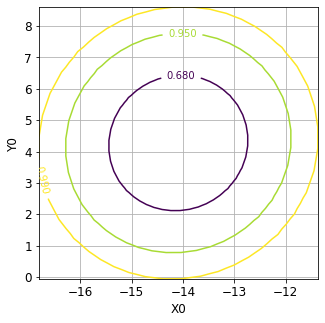

In [105]:
plt.figure(figsize=(5,5))
m.draw_mncontour("X0", "Y0",cl=[0.68,0.95,.99])
plt.grid()

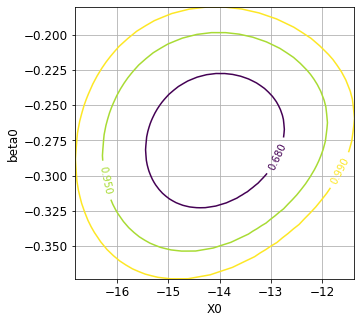

In [106]:
plt.figure(figsize=(5,5))
m.draw_mncontour("X0", "beta0",cl=[0.68,0.95,.99])
plt.grid()

In [107]:
m.draw_mncontour?

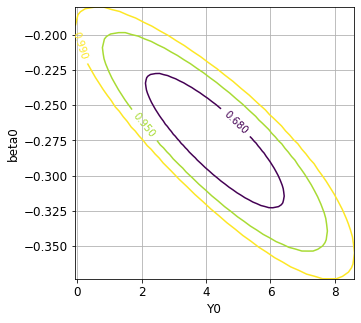

In [108]:
plt.figure(figsize=(5,5))
m.draw_mncontour("Y0", "beta0",cl=[0.68,0.95,.99])
plt.grid()

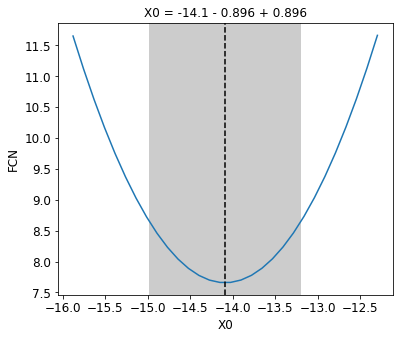

In [109]:
plt.figure(figsize=(6,5))
m.draw_mnprofile("X0");

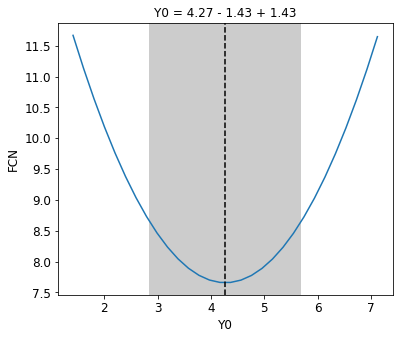

In [110]:
plt.figure(figsize=(6,5))
m.draw_mnprofile("Y0");

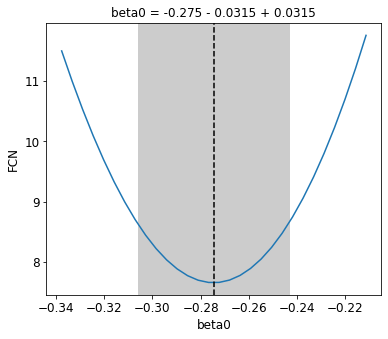

In [111]:
plt.figure(figsize=(6,5))
m.draw_mnprofile("beta0");

In [112]:
m.fval / (len(Xdata) - m.nfit)  # reduced chi2

0.5105318393142144

In [113]:
found_angle_minuit=m.params[2].value
X0_found_minuit=m.params[0].value
Y0_found_minuit=m.params[1].value

In [114]:
the_chi2=chi2func(Xdata,Ydata,alphadata,alphaerrdata,XX_ccd,YY_ccd,found_angle_minuit,c_Z0,Npar=2)

Text(0.5, 1.0, 'Minuit result : $\\chi2$ minimisation')

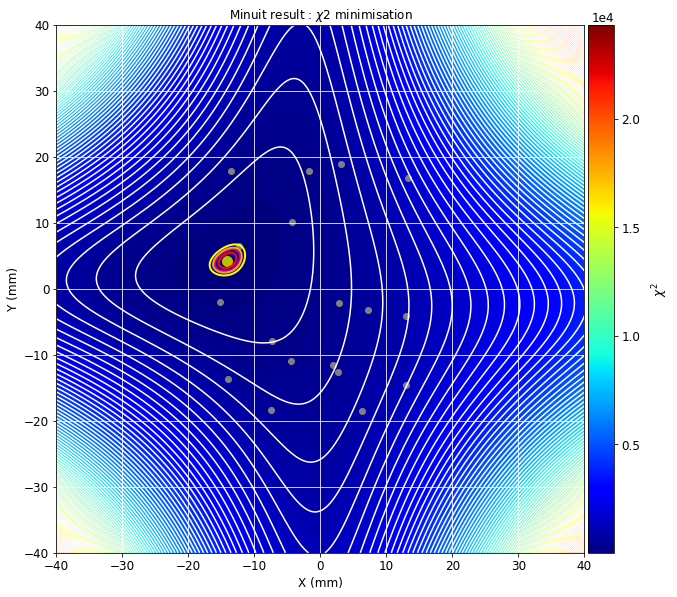

In [115]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)

the_chi2min=the_chi2.min()    # the minimum of chi2
the_levels= the_chi2min + Q
    
im1=ax1.imshow(the_chi2,origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=100,colors='w')
h1b = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=the_levels,colors=Qcolors,linewidths=2)

cs = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=[the_levels[0]],colors=Qcolors[0],linewidths=2)

p = cs.collections[0].get_paths()[0]
v = p.vertices
xcont = v[:,0]
ycont = v[:,1]


cbar1=fig.colorbar(im1,cax=cax1,format=cbformat)
cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$\\chi^2$', rotation=90)
ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("chi2, step 3",fontweight="bold",fontsize=25)
ax1.grid(color="w")


ax1.scatter(X0_found_minuit,Y0_found_minuit,marker="o",color="y",s=100)

ax1.scatter(Xdata,Ydata,marker="o",color="gray")

ax1.set_title("Minuit result : $\chi2$ minimisation")


In [116]:
# homothetie
xx_holo=XYtoxy(XX_ccd,c_Z0) 
yy_holo=XYtoxy(YY_ccd,c_Z0) 
x0,y0=XYtoxy_2D(X0_found_minuit,Y0_found_minuit,c_Z0)

# rotation
(xx1_holo,yy1_holo)=xytox1y1_2D(xx_holo,yy_holo,found_angle_minuit,x0,y0)
Z_Phi_ccd_minuit=dd_phi(xx1_holo,yy1_holo)

maxZ_Phi_minuit=np.max(np.abs(Z_Phi_ccd_minuit))

In [117]:
X0_found_minuit-x0

-0.11609519457353734

In [118]:
Y0_found_minuit-y0

0.03517909499825578

<ipython-input-119-3c25b51e77e1>:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  h = ax.contour(X_ccd,Y_ccd,Z_Phi_ccd_minuit,levels=50,colors='orange',linewidth=6)


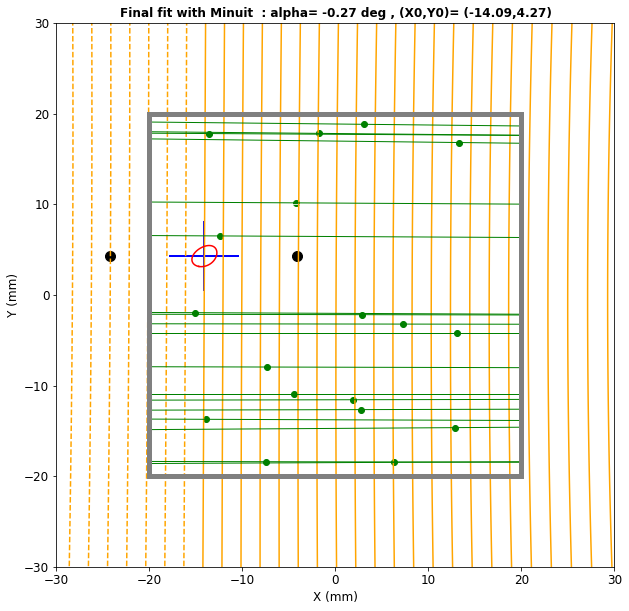

In [119]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
for idx in np.arange(NumberofPointsData):
    x_i=Xdata[idx]
    y_i=Ydata[idx]
    slope=np.tan(alphadata[idx]*u_degtorad)
    ax.scatter(x_i,y_i,marker="o",color="g")
    x_1=-20
    x_2=20
    y_1=(x_1-x_i)*slope+y_i
    y_2=(x_2-x_i)*slope+y_i
    ax.plot([x_1,x_2],[y_1,y_2],color="g",lw=1)
    
    
#im=ax.imshow(Z_Phi_ccd_3,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX),alpha=0.5,vmin=-maxZ_Phi_minuit,vmax=maxZ_Phi_minuit)
h = ax.contour(X_ccd,Y_ccd,Z_Phi_ccd_minuit,levels=50,colors='orange',linewidth=6)

# inverse rotation in hologram plane
xy_A = x1y1toxy(xy1_A,found_angle_minuit,X0_found_minuit,Y0_found_minuit)
xy_B = x1y1toxy(xy1_B,found_angle_minuit,X0_found_minuit,Y0_found_minuit)

# homothetie from hologram plane to CCD plane
XY_A = xytoXY(xy_A,c_Z0)
XY_B = xytoXY(xy_B,c_Z0)

#  show A,B sources
ax.scatter(XY_A[0],XY_A[1],marker="o",color="k",s=100)
ax.scatter(XY_B[0],XY_B[1],marker="o",color="k",s=100)

# hologram geometric center
ax.scatter(X0_found_minuit,Y0_found_minuit,marker="+",color="b",s=5000,lw=2)

# center contour line
ax.plot(xcont,ycont,'r-')

# CCD border
ax.plot([-20,-20],[-20,20],color="grey",lw=5)
ax.plot([20,20],[-20,20],color="grey",lw=5)
ax.plot([-20,20],[-20,-20],color="grey",lw=5)
ax.plot([-20,20],[20,20],color="grey",lw=5)
    
ax.set_xlim(-30,30)
ax.set_ylim(-30,30)

ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
title="Final fit with Minuit  : alpha= {:3.2f} deg , (X0,Y0)= ({:3.2f},{:3.2f})".format(found_angle_minuit,X0_found_minuit,Y0_found_minuit)
ax.set_title(title,fontweight="bold")
ax.grid(color="w")
    

### Zoom to see contours

<ipython-input-120-13e3b2620d5d>:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  h = ax.contour(X_ccd,Y_ccd,Z_Phi_ccd_minuit,levels=50,colors='orange',linewidth=6)


(-5.731076112571206, 14.268923887428794)

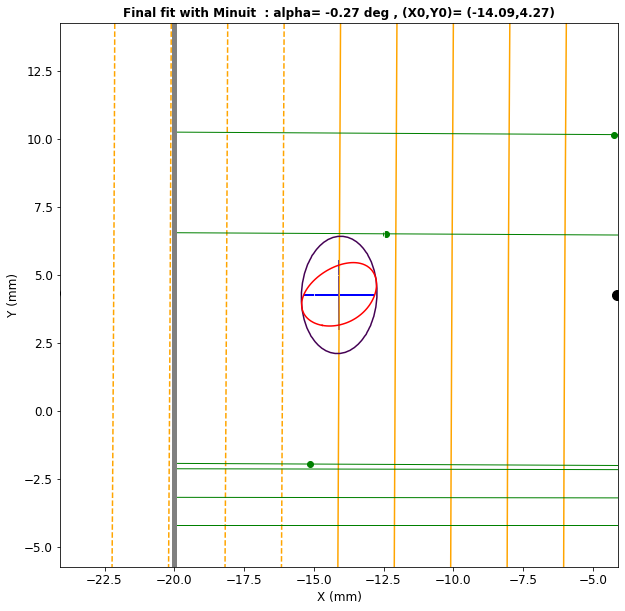

In [120]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
for idx in np.arange(NumberofPointsData):
    x_i=Xdata[idx]
    y_i=Ydata[idx]
    slope=np.tan(alphadata[idx]*u_degtorad)
    ax.scatter(x_i,y_i,marker="o",color="g")
    x_1=-20
    x_2=20
    y_1=(x_1-x_i)*slope+y_i
    y_2=(x_2-x_i)*slope+y_i
    ax.plot([x_1,x_2],[y_1,y_2],color="g",lw=1)
    
    
#im=ax.imshow(Z_Phi_ccd_3,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX),alpha=0.5,vmin=-maxZ_Phi_minuit,vmax=maxZ_Phi_minuit)
h = ax.contour(X_ccd,Y_ccd,Z_Phi_ccd_minuit,levels=50,colors='orange',linewidth=6)

# inverse rotation in hologram plane
xy_A = x1y1toxy(xy1_A,found_angle_minuit,X0_found_minuit,Y0_found_minuit)
xy_B = x1y1toxy(xy1_B,found_angle_minuit,X0_found_minuit,Y0_found_minuit)

# homothetie from hologram plane to CCD plane
XY_A = xytoXY(xy_A,c_Z0)
XY_B = xytoXY(xy_B,c_Z0)

#  show A,B sources
ax.scatter(XY_A[0],XY_A[1],marker="o",color="k",s=100)
ax.scatter(XY_B[0],XY_B[1],marker="o",color="k",s=100)

# hologram geometric center
ax.scatter(X0_found_minuit,Y0_found_minuit,marker="+",color="b",s=5000,lw=2)

# center contour line
ax.plot(xcont,ycont,'r-')

# minuit contour
#plt.plot(m.contour("X0", "Y0")[0],m.contour("X0", "Y0")[1],"m-")
m.draw_mncontour("X0", "Y0")

# CCD border
ax.plot([-20,-20],[-20,20],color="grey",lw=5)
ax.plot([20,20],[-20,20],color="grey",lw=5)
ax.plot([-20,20],[-20,-20],color="grey",lw=5)
ax.plot([-20,20],[20,20],color="grey",lw=5)
    
ax.set_xlim(-30,30)
ax.set_ylim(-30,30)

ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
title="Final fit with Minuit  : alpha= {:3.2f} deg , (X0,Y0)= ({:3.2f},{:3.2f})".format(found_angle_minuit,X0_found_minuit,Y0_found_minuit)
ax.set_title(title,fontweight="bold")
ax.grid(color="w")
ax.set_xlim(X0_found_minuit-10,X0_found_minuit+10)    
ax.set_ylim(Y0_found_minuit-10,Y0_found_minuit+10)    

# Search for bad data points

In [121]:
def GetRandomSubSample(df,nremove):
    """
    Remove nremove ramdom data points
    
    df : input dataframe with N row
    nremove : number of random raw to remove
    
    dfout : ramdom subsample
    """
    
    dfout=df.copy()
    N=len(dfout)
    
    indexes=np.arange(N)
    np.random.shuffle(indexes)
    random_indexes=np.copy(indexes)   
    removes_indexes=random_indexes[:nremove]

    dfout.drop(dfout.index[removes_indexes],inplace=True)
    
    return dfout

In [122]:
NTry=500
Nremov=8

all_X0=np.zeros(NTry)
all_Y0=np.zeros(NTry)
all_beta0=np.zeros(NTry)


for itry in np.arange(NTry):
    
    df_test = GetRandomSubSample(df,Nremov)
    selected_indexes = df_test.index
    
    NumberofPointsData=len(df_test)

    Xdata=df_test["X(mm)"].values
    Ydata=df_test["Y(mm)"].values
    alphadata=df_test["degré"].values
    alphaerrdata=df_test["dalpha"].values
    
    # initialisation of Minuit
    X0_th=-7.0
    Y0_th=+2.5
    beta_th=0
    
    m = Minuit(chi2_angle, X0=X0_th, Y0=Y0_th, beta0=beta_th)  # starting values
    m.errordef=1
    m.migrad() ; # finds minimum of least_squares function;
    all_X0[itry]=m.params[0].value
    all_Y0[itry]=m.params[1].value
    all_beta0[itry]=m.params[2].value
    
    if all_X0[itry] > -11:
        print(selected_indexes)


Text(0.5, 0.98, '$\\chi^2$ fit with Minuit of $(X_0,Y_0,\\beta_0)$, remove randomly 8 datapoints')

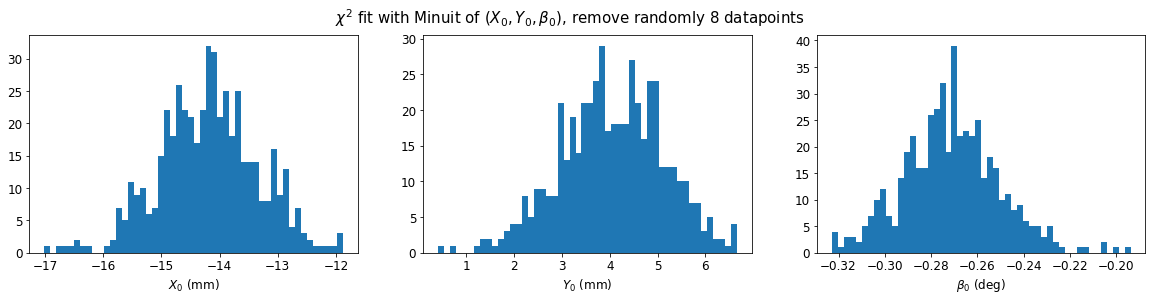

In [123]:
fig=plt.figure(figsize=(20,4))
ax1=fig.add_subplot(131)
ax1.hist(all_X0,bins=50);
ax1.set_xlabel("$X_0$ (mm)")

ax2=fig.add_subplot(132)
ax2.hist(all_Y0,bins=50);
ax2.set_xlabel("$Y_0$ (mm)")

ax3=fig.add_subplot(133)
ax3.hist(all_beta0,bins=50);
ax3.set_xlabel("$\\beta_0$ (deg)")

title="$\chi^2$ fit with Minuit of $(X_0,Y_0,\\beta_0)$, remove randomly {} datapoints".format(Nremov)
plt.suptitle(title,fontsize=15)